In [1]:
from clusteringFunctions import *
from extractFeatures import *
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore",FutureWarning)

TFIDF vectorization and clustering of the cleaned texts in the Charity Sermons dataset

In [ ]:
textInfo = getTexts('/Users/amycweng/Digital Humanities/charityTXT',tcpIDs,True)
print(len(textInfo))
vector = TfidfVectorizer(norm=None, sublinear_tf=True)
tfidf_texts = vector.fit_transform(textInfo.values())
df = pd.DataFrame(tfidf_texts.toarray(), index=textInfo.keys(), columns=vector.get_feature_names()) 

In [ ]:
'''Clustering based only on the original texts (no other features)'''
elbow(df)

In [ ]:
intercluster(df,3)
groups = pca_cluster(df,3,tcpIDs)

In [ ]:
for groupNum, ids_list in groups.items(): 
    if len(ids_list) == 1:
        print(f'There is {len(ids_list)} text in Group {groupNum}')
    else: 
        print(f'There are {len(ids_list)} texts in Group {groupNum}')
    if groupNum != 0: 
        print(f'\tTitles: {find_titles(ids_list),idToTitle}')
        print(f'\tGroup {groupNum} TCP IDs: {ids_list}')
    print(f'\tThe locations for the texts in this cluster: {count_features(location,ids_list)}')
    print(f'\tThe audiences for the texts in this cluster: {count_features(audience,ids_list)}')
    print(f'\tWhether or not the text mentions the provision of material help to the needy: {count_features(help_poor,ids_list)}')
    print(f'\tTop 20 TFIDF terms for the texts within this cluster: {Counter(top_terms(ids_list,textInfo.keys(),tfidf_texts,vector)).most_common(n=20)}')

    print(f'\tTop 20 Bigrams and Trigrams of Keywords: {count_features(ngrams,ids_list)}')
    print(f'\tTop 20 Topic Words: {count_features(topics,ids_list)}')
    print(f'\tAll subject headings: {count_features(subjects,ids_list)}')

    print(f'\tTop 20 Biblical/Apocryphal Citations: {count_features(all_citations,ids_list,"all citations")}')
    print(f'\tTop 20 Biblical/Apocryphal Citations Relating to Charity: {count_features(charity_citations,ids_list,"charity citations")}.\n\n')

In [72]:
'''Comparison of the performance of the TFIDF Transformer + Count Vectorizer vs. only the TfidfVectorizer'''
tcpID = 'A55754'
single_text_df = pd.DataFrame(tfidf_texts[[_ for _ in textInfo.keys()].index(tcpID)].T.todense(), index=vector.get_feature_names(), columns=[tcpID])
single_text_df = single_text_df.sort_values(tcpID, ascending=False)
top_tfidf = list(single_text_df.head(25).T.columns)
print(f'Method A (sublinear TF & no normalization): ', top_tfidf)

vector = TfidfVectorizer()
tfidf_results = vector.fit_transform(textInfo.values())
single_text_df = pd.DataFrame(tfidf_texts[[_ for _ in textInfo.keys()].index(tcpID)].T.todense(), index=vector.get_feature_names(), columns=[tcpID])
single_text_df = single_text_df.sort_values(tcpID, ascending=False)
top_tfidf = list(single_text_df.head(25).T.columns)
print(f'Method B (default): ', top_tfidf)

Method A (sublinear TF & no normalization):  ['arminius', 'execration', 'stafford', 'preston', 'fullness', 'accurse', 'maranatha', 'anathema', 'treatise', 'sup', 'hater', 'dominion', 'forgive', 'sabboath', 'dd', 'love', 'aswell', 'godliness', 'ebal', 'tabor', 'olivet', 'matthew', 'spouse', 'god', 'sign']
Method B (default):  ['love', 'god', 'lord', 'sin', 'christ', 'heart', 'grace', 'fullness', 'take', 'good', 'give', 'power', 'jesus', 'godliness', 'faith', 'spirit', 'desire', 'receive', 'believe', 'forgive', 'accurse', 'show', 'curse', 'work', 'keep']


The code below shows the TFIDF vectorization and clustering of all marginal citations in the Charity Sermons Dataset

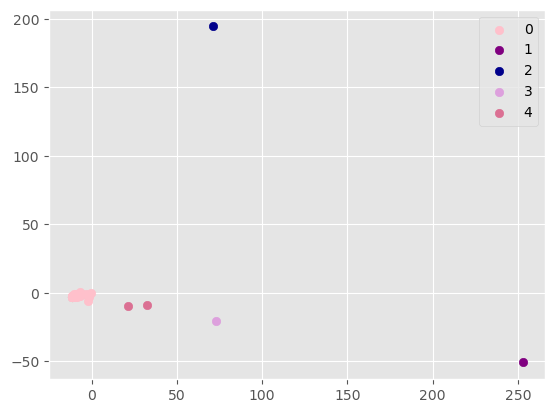

<Figure size 2000x1000 with 0 Axes>

In [3]:
cited = {}
for tcpID, c_list in all_citations.items(): 
    citations = []
    if len(c_list) == 0: 
        continue
    for passage in c_list: 
        '''Transform the citation into one unit using underscores'''
        passage = re.sub(':','_',passage)
        passage = passage.split(' ')
        passage = '_'.join(passage)
        citations.append(passage)        
        '''Extracting only the book'''
        # book = passage.split(' ')
        # if book[0] == '1' or book[0] == '2': 
        #     citations.append(f'{book[0]}_{book[1]}')
        # else: 
        #     citations.append(f'{book[0]}')
        '''Extracting only the chapter'''
        # book = passage.split(' ')
        # if book[0] == '1' or book[0] == '2': 
        #     book[2] = book[2].split(':')[0]
        #     citations.append(f'{book[0]}_{book[1]}_{book[2]}')
        # else: 
        #     book[1] = book[1].split(':')[0]
        #     citations.append(f'{book[0]}_{book[1]}')
    cited[tcpID] = ' '.join(citations)
'''Tfidf vectorization'''
vector = TfidfVectorizer(norm=None, sublinear_tf=True)
tfidf_results = vector.fit_transform(cited.values())
df = pd.DataFrame(tfidf_results.toarray(), index=cited.keys(), columns=vector.get_feature_names()) 
# elbow(df)
# intercluster(df,3)
groups = pca_cluster(df,5,cited.keys())

In [5]:
for groupNum in sorted(groups.keys()):
    ids_list = groups[groupNum]
    groupNum += 1
    if len(ids_list) == 1:
        print(f'There is {len(ids_list)} text in Group {groupNum}')
    else: 
        print(f'There are {len(ids_list)} texts in Group {groupNum}')
    if groupNum != 0: 
        print(f'Titles: {find_titles(ids_list,idToTitle)}')
    author_id = []
    for tcpID in ids_list:
        for entry in idAuthor: 
            if tcpID in entry: 
                author_id.append(entry) 
    print(f'Group {groupNum+1} TCP IDs: {author_id}')
    print(f'\tThe locations for the texts in this cluster: {count_features(location,ids_list)}')
    print(f'\tThe audiences for the texts in this cluster: {count_features(audience,ids_list)}')
    print(f'\tWhether or not the text mentions the provision of material help to the needy: {count_features(help_poor,ids_list)}')
    print(f'\tHere are the top 10 TF-IDF citations of the cluster centroids: {Counter(top_terms(ids_list,cited.keys(),tfidf_results,vector)).most_common(n=10)}')

    print(f'\tTop 20 Bigrams and Trigrams of Keywords: {count_features(ngrams,ids_list)}')
    print(f'\tTop 20 Topic Words: {count_features(topics,ids_list)}')
    print(f'\tAll subject headings: {count_features(subjects,ids_list)}')

    print(f'\tMost Frequent Scriptural Citations: {count_features(all_citations,ids_list,"all citations")}')
    print(f'\tMost Frequent Charity-Related Scriptural Citations: {count_features(charity_citations,ids_list,"charity citations")}.\n\n')

There are 48 texts in Group 1
Titles: ['A09990: The nevv covenant, or the saints portion A treatise vnfolding', 'A09963: An elegant and lively description of spirituall life and death', 'A02565: One of the sermons preacht at Westminster, on the day', 'A85485: The progresse of divine providence, set out in a sermon', 'A09981: A liveles life: or, Mans spirituall death in sinne Wherein', 'A10010: The saints qualification: or A treatise I. Of humiliation, in', "A70130: Mercies memorial set out in a sermon preached in Paul's", 'A09950: The breast-plate of faith and love. A treatise, wherein the', 'A10024: Sins overthrow: or, A godly and learned treatise of mortification', 'A14989: A bride-bush, or A vvedding sermon compendiously describing the duties', "A01531: The decease of Lazarus Christ's friend A funerall sermon on", 'A01530: Maskil le-David = Dauids instructer A sermon preached at the', 'A02591: The true peace-maker laid forth in a sermon before his', 'A01547: Saint Stevens last will 

The code below shows the TFIDF vectorization and clustering of marginal citations related to charity in the Charity Sermons Dataset

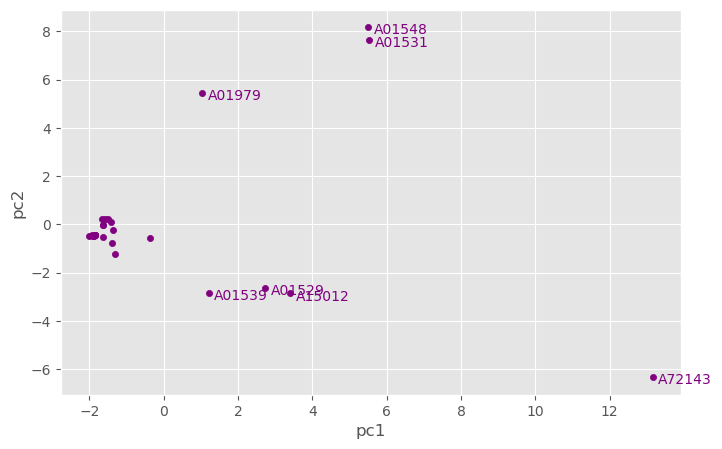

In [6]:
cited = {}
for tcpID, c_list in charity_citations.items(): 
    if len(c_list) == 0: 
        continue
    citations = []
    for passage in c_list: 
        '''Transform the citation into one unit using underscores'''
        passage = re.sub(':','_',passage)
        passage = passage.split(' ')
        passage = '_'.join(passage)
        citations.append(passage)        
    cited[tcpID] = ' '.join(citations)
'''Tfidf vectorization'''
vector = TfidfVectorizer(norm=None, sublinear_tf=True)
tfidf_results = vector.fit_transform(cited.values())
df = pd.DataFrame(tfidf_results.toarray(), index=cited.keys(), columns=vector.get_feature_names()) 

pca = PCA(n_components=2)
pca_results = pca.fit_transform(df) 
pca_df = pd.DataFrame(pca_results, index=list(df.index), columns=["pc1","pc2"])

ax = pca_df.plot(x='pc1',y='pc2',kind="scatter",figsize=(8, 5),s=20,c='purple')
for txt in pca_df.index:
    if txt in ['A15012', 'A72143', 'A01531', 'A01548','A01979','A01529','A01539']:
        x = pca_df.pc1.loc[txt]
        y = pca_df.pc2.loc[txt]
        ax.annotate(txt, (x,y),fontsize=10,
                    xytext=(4,-5),textcoords='offset points',
                    family='sans-serif', color='purple')

In [8]:
model = KMeans(n_clusters=4) 
label = model.fit_predict(pca_results)
groups = defaultdict(list) 
for k,v in zip(label,list(cited.keys())):
    groups[k].append(v)

for groupNum, ids_list in groups.items(): 
    author_id = []
    for tcpID in ids_list:
        for entry in idAuthor: 
            if tcpID in entry: 
                author_id.append(entry)
    if len(ids_list) == 1:
        print(f'There is {len(ids_list)} text in Group {groupNum}')
    else: 
        print(f'There are {len(ids_list)} texts in Group {groupNum}')
    # if groupNum != 1: 
    #     print(f'Titles: {find_titles(ids_list,idToTitle)}')
    print(f'Group {groupNum+1} TCP IDs: {author_id}')
    print(f'\tThe locations for the texts in this cluster: {count_features(location,ids_list)}')
    print(f'\tThe audiences for the texts in this cluster: {count_features(audience,ids_list)}')
    print(f'\tWhether or not the text mentions the provision of material help to the needy: {count_features(help_poor,ids_list)}')
    print(f'\tHere are the top 10 TF-IDF citations of the cluster centroids: {Counter(top_terms(ids_list,cited.keys(),tfidf_results,vector)).most_common(n=10)}')

    print(f'\tTop 20 Bigrams and Trigrams of Keywords: {count_features(ngrams,ids_list)}')
    print(f'\tTop 20 Topic Words: {count_features(topics,ids_list)}')
    print(f'\tAll subject headings: {count_features(subjects,ids_list)}')

    print(f'\tMost Frequent Scriptural Citations: {count_features(all_citations,ids_list,"all citations")}')
    print(f'\tMost Frequent Charity-Related Scriptural Citations: {count_features(charity_citations,ids_list,"charity citations")}.\n\n')

There are 20 texts in Group 1
Group 2 TCP IDs: ['Gouge_A85485', 'Preston_A09950', 'Preston_A10024', 'Gataker_A01530', 'Gataker_A01547', 'Crashaw_A19588', 'Crashaw_A19589', 'Gataker_A01528', 'Gouge_A85487', 'Gataker_A01523', 'Crashaw_A19590', 'Gataker_A01554', 'Whately_A15015', 'Gataker_A01534', 'Hall_A02571', 'Preston_A09977', 'Gataker_A01533', 'Whately_A14996', 'Preston_A09971', 'Gataker_A68088']
	The locations for the texts in this cluster: [("St Paul's Cross", 4), ('London', 2), ("Lincoln's Inn or Cambridge", 2), ("St Mary's Church, Rotherhithe", 2), ('All Hallows Bread St', 1), ('Church of St Mary-at-Lambeth', 1), ('Temple', 1), ('House of Parliament', 1), ("Lincoln's Inn", 1), ('Holy Trinity Church, Cambridge', 1), ("Sergeant's Inn", 1), ('Westminster Abbey', 1), ('Tonbridge Free School', 1), ("St. Mary's Church, Banbury", 1)]
	The audiences for the texts in this cluster: [('local', 11), ('funeral', 4), ('company', 1), ('house of commons', 1), ('wedding', 1), ('house of lords', 1)

Vectorization and clustering of the context windows (20 words before and after) around key terms

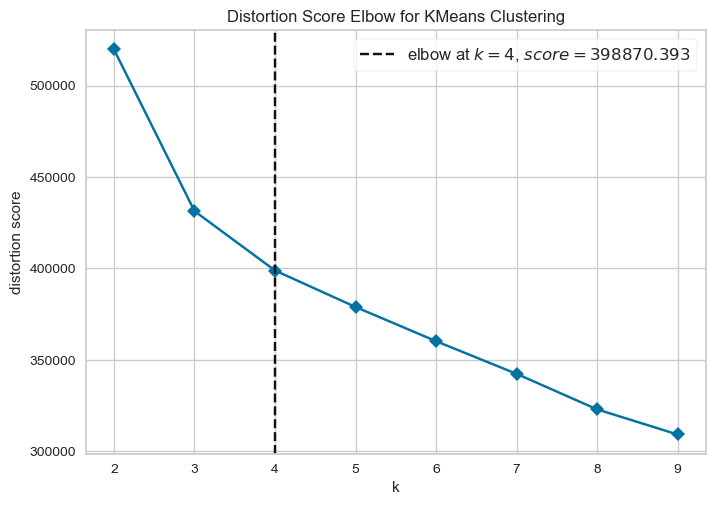

In [9]:
contexts = getTexts('/Users/amycweng/Digital Humanities/charityContexts',tcpIDs,False)
vector = TfidfVectorizer(norm=None, sublinear_tf=True)
tfidf_results = vector.fit_transform(contexts.values())
df = pd.DataFrame(tfidf_results.toarray(), index=contexts.keys(), columns=vector.get_feature_names()) 
elbow(df)

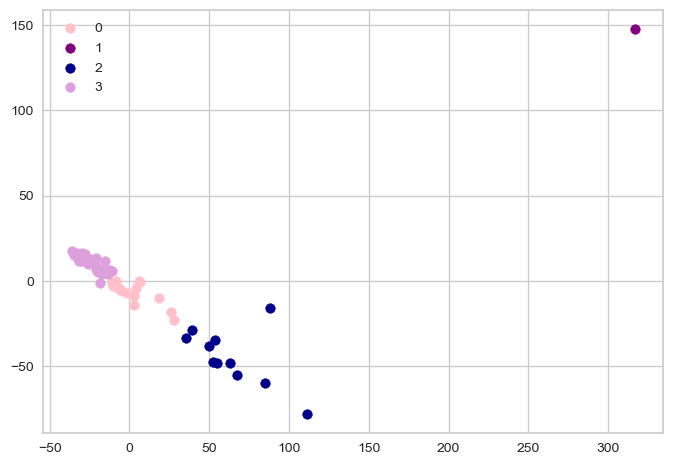

<Figure size 2000x1000 with 0 Axes>

In [10]:
groups = pca_cluster(df,4,tcpIDs)

In [14]:
for groupNum, ids_list in groups.items(): 
    author_id = []
    for tcpID in ids_list:
        for entry in idAuthor: 
            if tcpID in entry: 
                author_id.append(entry)
    if len(ids_list) == 1:
        print(f'There is {len(ids_list)} text in Group {groupNum}')
    else: 
        print(f'There are {len(ids_list)} texts in Group {groupNum}')
    # if groupNum != 1: 
    #     print(f'Titles: {find_titles(ids_list,idToTitle)}')
    print(f'Group {groupNum+1} TCP IDs: {author_id}')
    print(f'\tThe locations for the texts in this cluster: {count_features(location,ids_list)}')
    print(f'\tThe audiences for the texts in this cluster: {count_features(audience,ids_list)}')
    print(f'\tWhether or not the text mentions the provision of material help to the needy: {count_features(help_poor,ids_list)}')
    print(f'\tHere are the top 10 TF-IDF terms of the cluster centroids: {Counter(top_terms(ids_list,contexts.keys(),tfidf_results,vector)).most_common(n=10)}')

    print(f'\tTop 20 Bigrams and Trigrams of Keywords: {count_features(ngrams,ids_list)}')
    print(f'\tTop 20 Topic Words: {count_features(topics,ids_list)}')
    print(f'\tAll subject headings: {count_features(subjects,ids_list)}')

    print(f'\tMost Frequent Scriptural Citations: {count_features(all_citations,ids_list,"all citations")}')
    print(f'\tMost Frequent Charity-Related Scriptural Citations: {count_features(charity_citations,ids_list,"charity citations")}.\n\n')

There are 11 texts in Group 2
Group 3 TCP IDs: ['Gataker_A68088', 'Gataker_A01523', 'Gouge_A41670', 'Preston_A55748', 'Preston_A10010', 'Preston_A09958', 'Hall_A86974', 'Gataker_A01533', 'Gataker_A01530', 'Hall_A02591', 'Whately_A15012']
	The locations for the texts in this cluster: [('London', 1), ('All Hallows Bread St', 1), ('St Ann Blackfriars', 1), ("Lincoln's Inn or Cambridge", 1), ("Lincoln's Inn", 1), ('Holy Trinity Church, Cambridge', 1), ('Palace of Whitehall', 1), ("Sergeant's Inn", 1), ('Tonbridge Free School', 1), ('Theobalds Palace', 1), ("St. Mary's Church, Banbury", 1)]
	The audiences for the texts in this cluster: [('local', 6), ('funeral', 2), ('monarch', 2), ('school', 1)]
	Whether or not the text mentions the provision of material help to the needy: [(True, 6), (False, 5)]
	Here are the top 10 TF-IDF terms of the cluster centroids: [('disobedience', 2), ('justice', 2), ('drsse', 1), ('crop', 1), ('trash', 1), ('mortality', 1), ('dung', 1), ('beginning', 1), ('death'